In [161]:
# funcoes genericas que podem ser re-usadas em outros problemas

import math
import matplotlib.pyplot as pyplot
import numpy as np
import matplotlib as mpl
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D


# funcoes base para implementar o Euler. 
# Deve-se implementar a funcao rates, que depende de cada modelo.

def initStateVector(s):
    return np.array(s)

def updateStateVectorEuler(s,dt, rateFunc):
    return s + rateFunc(s,dt)

# State Vector Trajectories store state space evolution. Uses list to init empty.

def initSVTrajectory():
    return []

# append s a svt
def updateSVTrajectory(svt,s):
    svt.append(s)
    return svt

def extractSVTrajectory(svt,i): # returns the trajectory as numpy array
    foo = np.array(svt)
    return foo[:,i]
  
def plotEuler(vxe, vtime):
    fig, ax = pyplot.subplots()
    pyplot.plot(vtime, vxe, label='Euler',linestyle='',marker='o') 
    pyplot.title('Posição')
    ax.set_xlabel('Tempo (segundos)')
    ax.set_ylabel('Posição (metros)')
    pyplot.show(block=False)
    
def erroTrajetorias(v1,v2,tipoErro):
    if (tipoErro == 0): # erro com sinal
        return(np.array(v1) - np.array(v2))
    elif (tipoErro == 1): # erro quadratico
        return((np.array(v1) - np.array(v2))**2)
    elif (tipoErro == 2): # erro em modulo
        return(fabs((np.array(v1) - np.array(v2))))
    

def easyPlot(v,title):
    pyplot.figure()
    pyplot.plot(v)
    pyplot.title(title)
    pyplot.show()

def easyPlot2D(x,y,title, df, col, xlabel, ylabel, scatter = True):
    pyplot.figure()
    pyplot.plot(x, y, label = 'Simulação')
    pyplot.scatter(df.time, df[col], c = 'tab:orange', label = 'Experimento')
    pyplot.plot(df.time, df[col], c = 'tab:orange') 
    pyplot.title(title)
    pyplot.legend()
    pyplot.xlabel(xlabel)
    pyplot.ylabel(ylabel)
    pyplot.show()
    
def easyPlot3D(x,y,z,title,xl,yl,zl):
    mpl.rcParams['legend.fontsize'] = 10
    fig = pyplot.figure()
    ax = fig.gca(projection='3d')
    ax.plot(x, y, z, label=title)
    ax.set_xlabel(xl)
    ax.set_ylabel(yl)
    ax.set_zlabel(zl)
    ax.legend()
    pyplot.show()


In [162]:
dfP = pd.read_csv('DATA/pWVel.csv')
dfFF = pd.read_csv('DATA/ffWVel.csv')

Equações Queda Livre:

$$a = g$$
$$\frac{d}{dt}(v) = a \Rightarrow v_{i+1} = a_{i} \cdot dt + v_{i}$$
$$\frac{d}{dt}(x) = v \Rightarrow x_{i+1} = v_{i} \cdot dt + x{i}$$

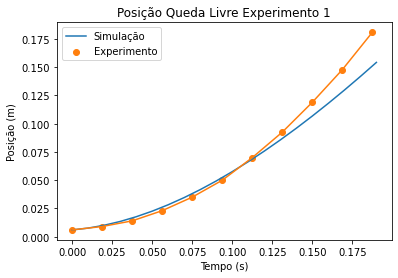

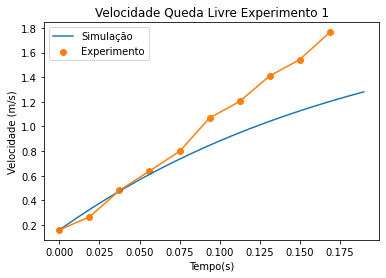

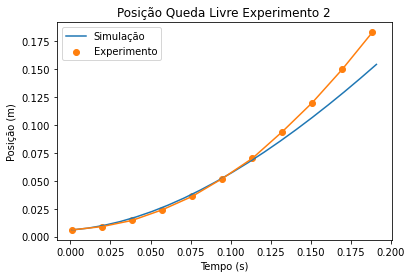

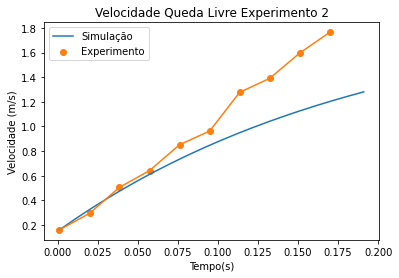

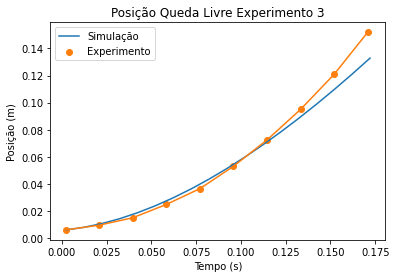

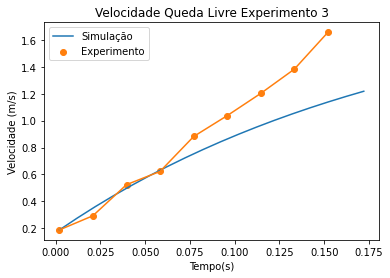

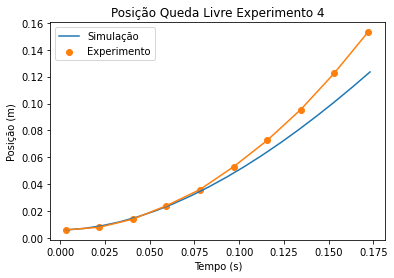

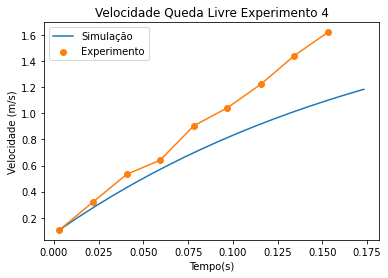

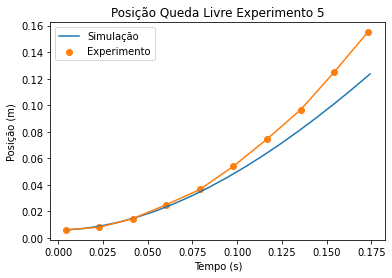

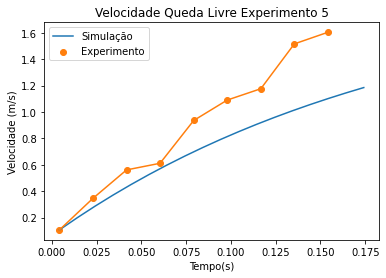

In [171]:
def ratesFreeFall(s,dt):
    g = 9.8
    r0 = s[1]*dt #+thetai
    r1 = g*dt
    r2 = dt
    return np.array([r0,r1,r2])

def ratesFreeFallWithDrag(s, dt):
    g = 9.8
    dragCoefficient = 5
    a = 9.8 - dragCoefficient*s[1]
    r0 = s[1]*dt #+thetai
    r1 = a*dt
    r2 = dt
    
    return np.array([r0,r1,r2])

def ratesPendulum(s,dt):
    g = 9.8
    L = 0.2905
    r1 = (-g*s[0]*dt)/L #+omegai 
    r0 = (s[1] + r1)*dt #+thetai
    r2 = dt
    return np.array([r0,r1,r2])

def main(df, positionName, experimentName, rateFunction, positionUnity):
        
    experiments = df['experiment'].unique()
    
    for ex in experiments:
        dff = df.loc[df['experiment'] == ex]
        
        firstrow = dff.iloc[0]
        
        t0 = dff.time.min()
        it0 = dff.time.idxmin()
        tf = dff.time.max()
        x0 = firstrow[positionName]
        v0 = firstrow['velocity']
        dt = 0.01
        #dt = dff.time[it0 + 1] - dff.time[it0]
        
        stateVectorEuler = initStateVector([x0,v0,t0])
        stateVectorEuler = initStateVector([x0,v0,t0])
    
    
        svtEuler = initSVTrajectory() 
    
        while (stateVectorEuler[2] < tf + dt/2):    
            svtEuler        = updateSVTrajectory(svtEuler,list(stateVectorEuler))
            stateVectorEuler = updateStateVectorEuler(stateVectorEuler,dt, rateFunction)
        
        vx = extractSVTrajectory(svtEuler,0)
        vv = extractSVTrajectory(svtEuler,1)
        vtime = extractSVTrajectory(svtEuler,2)

        easyPlot2D(vtime, vx, f'Posição {experimentName} Experimento {ex}', dff, positionName, 'Tempo (s)', f'Posição ({positionUnity})')
        easyPlot2D(vtime, vv, f'Velocidade {experimentName} Experimento {ex}', dff, 'velocity', 'Tempo(s)', f'Velocidade ({positionUnity}/s)')

main(dfFF, 'position', 'Queda Livre', ratesFreeFallWithDrag, 'm')        
